In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

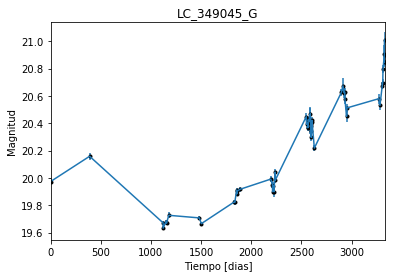

In [2]:
data = np.genfromtxt('LC_349045_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_349045_G')
plt.savefig("LC_349045_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

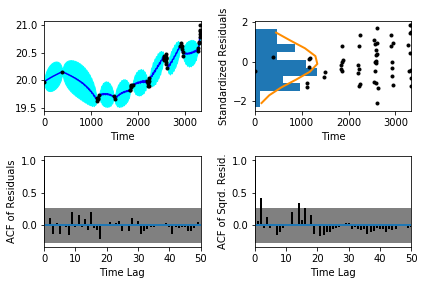

In [5]:
sample.assess_fit()

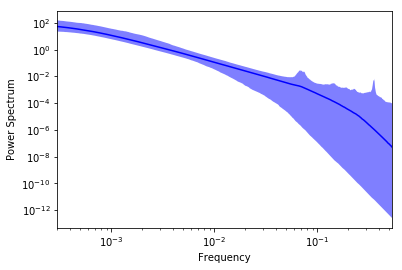

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

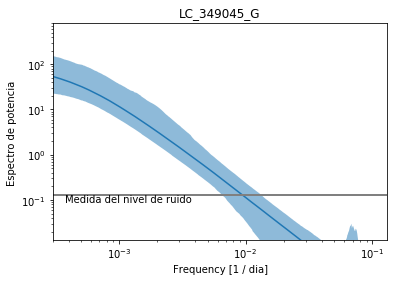

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_349045_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_349045_G')

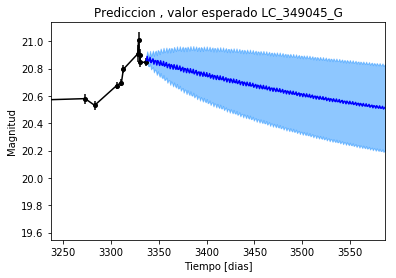

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_349045_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_349045_G')

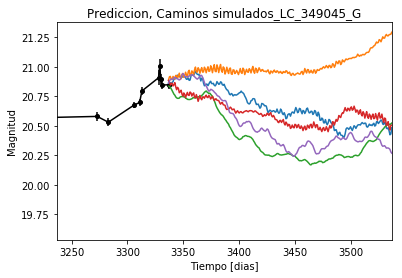

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_349045_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


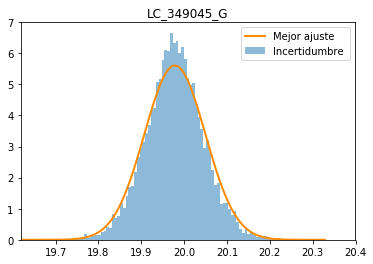

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_349045_G')
plt.savefig("Mejor_ajuste_LC_349045_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_349045_G')

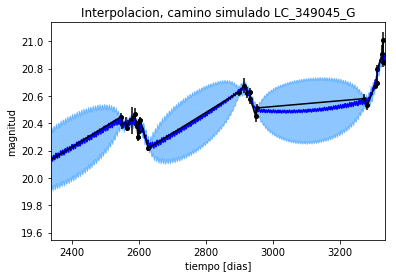

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_G')

Text(0.5,1,'Interpolacion, camino simulado LC_349045_G')

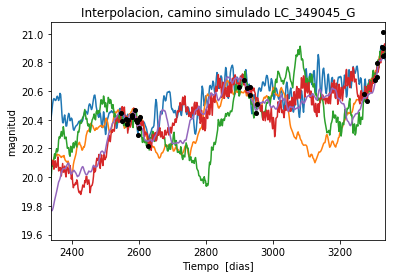

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1174.66614805
Median: 0.0201239092146
Standard deviation: 0.192012032651
68% credibility interval: [ 0.00148992  0.1735129 ]
95% credibility interval: [  4.21279909e-04   7.86547538e-01]
99% credibility interval: [  3.19765532e-04   1.00902319e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 767.949309374
Median: 0.0136217943377
Standard deviation: 0.121059431786
68% credibility interval: [ 0.00101749  0.09868506]
95% credibility interval: [  3.36320174e-04   4.51764668e-01]
99% credibility interval: [  3.04247057e-04   8.20629397e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 310.829914412
Median: 0.0859823051125
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 314.506475079
Median: 79.302025457
Standard deviation: 2.3185719321
68% credibility interval: [ 76.74011004  81.04841875]
95% credibility interval: [ 73.53795676  82.94842516]
99% credibility interval: [ 71.27807541  83.50843484]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 826.564664824
Median: 1.12718791783
Standard deviation: 2.69377734645
68% credibility interval: [ 0.16572031  4.95151355]
95% credibility interval: [ 0.04020512  9.3144656 ]
99% credibility interval: [  0.0193757  12.6572852]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 163.184876289
Median: 3.42694705695
Standard deviation: 14.1401379106
68% credibility interval: [  0.26164005  19.42774202]
95% credibility interval: [  0.05694146  4

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0294443
Median: 1.19508486474e-21
Standard deviation: 3.27918223827e+14
68% credibility interval: [  4.76979000e-45   7.62411536e-08]
95% credibility interval: [  3.25154909e-82   9.21988090e+00]
99% credibility interval: [  1.23302872e-87   1.58382991e+02]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1567.93266148
Median: 20.1445150621
Standard deviation: 0.165398803742
68% credibility interval: [ 19.99291196  20.30024751]
95% credibility interval: [ 19.8287275   20.47693799]
99% credibility interval: [ 19.68022392  20.64192819]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 405.721130092
Median: 0.188077477613
Standard deviation: 0.274399388389
68% credibility interval: [ 0.03937817  0.57880879]
95% credibility interval: [ 0.        0.981184]
99% credibility interval: [ 0.          1.04309428]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 405.721130092
Median: 0.188077477613
Standard deviation: 0.274399388389
68% credibility interval: [ 0.03937817  0.57880879]
95% credibility interval: [ 0.        0.981184]
99% credibility interval: [ 0.          1.04309428]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 793.847856625
Median: 0.0
Standard deviation: 0.000234048048267
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 314.506475079
Median: 79.302025457
Standard deviation: 2.3185719321
68% credibility interval: [ 76.74011004  81.04841875]
95% credibility interval: [ 73.53795676  82.94842516]
99% credibility interval: [ 71.27807541  83.50843484]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1973.56003672
Median: 0.106895419946
Standard deviation: 0.0917794650003
68% credibility interval: [ 0.07452734  0.16663403]
95% credibility interval: [ 0.0549744   0.29768454]
99% credibility interval: [ 0.04523826  0.54222746]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 304.779676064
Median: 1.11362551907
Standard deviation: 0.253561948236
68% credibility interval: [ 0.90506371  1.40473247]
95% credibility interval: [ 0.74825631  1.74555378]
99% credibility interval: [ 0.66691068  1.91873176]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 419.387744885
Median: 0.0250063196764
Standard deviation: 0.768520235096
68% credibility interval: [ 0.00059105  0.356957  ]
95% credibility interval: [  5.02837715e-05   2.34660246e+00]
99% credibility interval: [  5.18630572e-06   4.86278034e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1174.66614805
Median: (-0.1264422507-0.442900431639j)
Standard deviation: 2.10429161919
68% credibility interval: [-1.09021368-5.21075451j -0.00936145-0.88294115j]
95% credibility interval: [ -4.94202394e+00+0.j         -2.64697974e-03-3.3631662j]
99% credibility interval: [ -6.33987967e+00+0.j          -2.00914609e-03-0.41301793j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 767.949309374
Median: (-0.08558825804+0.737971173123j)
Standard deviation: 1.88443621924
68% credibility interval: [-0.62005653+0.84387065j -0.00639309+1.70857076j]
95% credibility interval: [ -2.83852112e+00+0.j          -2.11316198e-03+0.42560917j]
99% credibility interval: [ -5.15616657e+00+6.42140199j  -1.91164064e-03+0.j        ]
Posterior